<a href="https://colab.research.google.com/github/Azhar-ali7/Classification-Project-Coronavirus-Tweet-Sentiment/blob/main/Classification_project_Covid_19_Tweets_Sentiments_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis : Predicting sentiment of COVID-19 tweets

## Problem Description

This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

The names and usernames have been given codes to avoid any privacy concerns.

You are given the following information:



1.   Location
2.   Tweet At
3.   Original Tweet
4.   Label

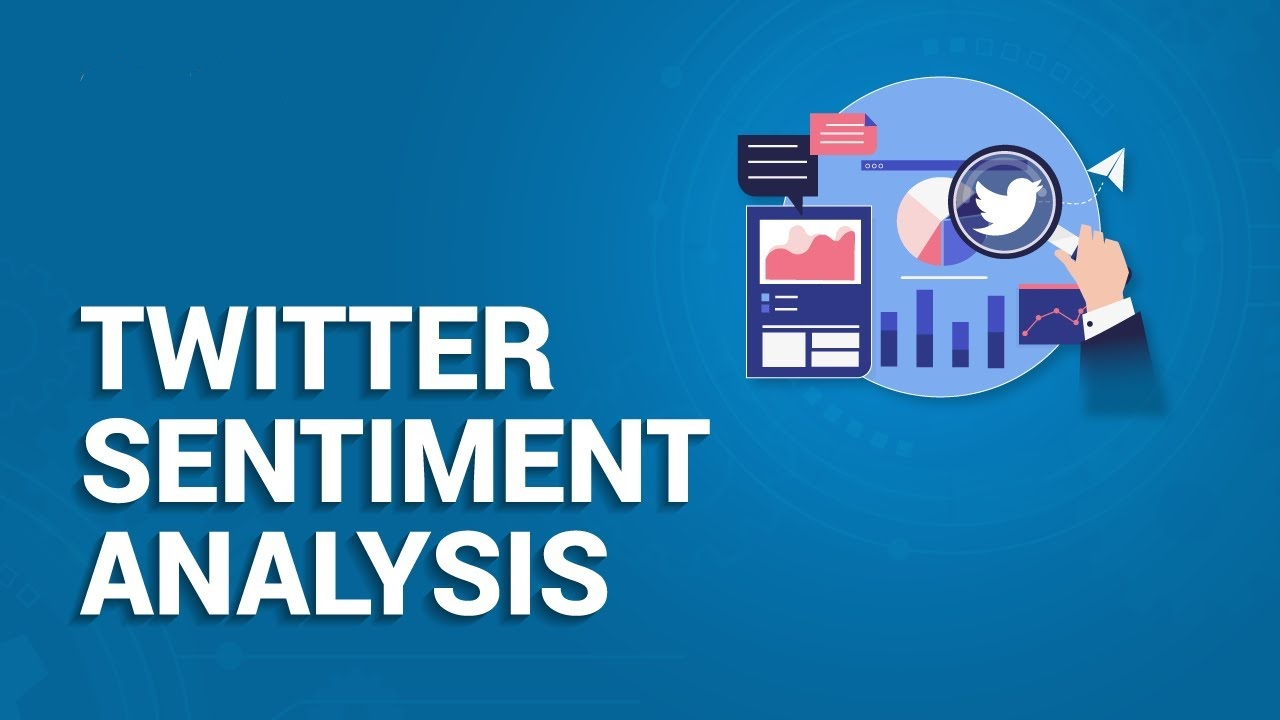

## Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

In [2]:
url = 'https://raw.githubusercontent.com/Azhar-ali7/Classification-Project-Coronavirus-Tweet-Sentiment/main/Coronavirus%20Tweets.csv'
tweet_df = pd.read_csv(url, encoding = 'latin-1')

Let's look at the top five rows and columns of the dataset.

In [3]:
# Top five rows of the dataset
tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
# No. of rows in Dataset are
print('No. of rows in Dataset are', tweet_df.shape[0])

# No. of columns in Dataset are
print('No. of columns in Dataset are', tweet_df.shape[1])

No. of rows in Dataset are 41157
No. of columns in Dataset are 6


In [5]:
# Checking for uniques values in the data set
for j in tweet_df.columns:
  print('Total unique values in column', j, "->", len(tweet_df.values),'\n' )

Total unique values in column UserName -> 41157 

Total unique values in column ScreenName -> 41157 

Total unique values in column Location -> 41157 

Total unique values in column TweetAt -> 41157 

Total unique values in column OriginalTweet -> 41157 

Total unique values in column Sentiment -> 41157 



In [6]:
# columns in dataset
tweet_df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [7]:
# Description of the dataset
tweet_df.describe(include='all')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,32567,41157,41157,41157
unique,NaN,NaN,12220,30,41157,5
top,NaN,NaN,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,NaN,NaN,540,3448,1,11422
mean,24377.000000,69329.000000,NaN,NaN,NaN,NaN
std,11881.146851,11881.146851,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,14088.000000,59040.000000,NaN,NaN,NaN,NaN
50%,24377.000000,69329.000000,NaN,NaN,NaN,NaN
75%,34666.000000,79618.000000,NaN,NaN,NaN,NaN


In [8]:
# Info
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


As we saw in the cell above that there are some null values present in the 'Location' column. Now, let's find out the exact number of missing values.

In [9]:
# Finding missing values
tweet_df.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [10]:
# Null values in terms of percentage
tweet_df.isna().sum()/tweet_df.shape[0]*100

UserName          0.000000
ScreenName        0.000000
Location         20.871298
TweetAt           0.000000
OriginalTweet     0.000000
Sentiment         0.000000
dtype: float64

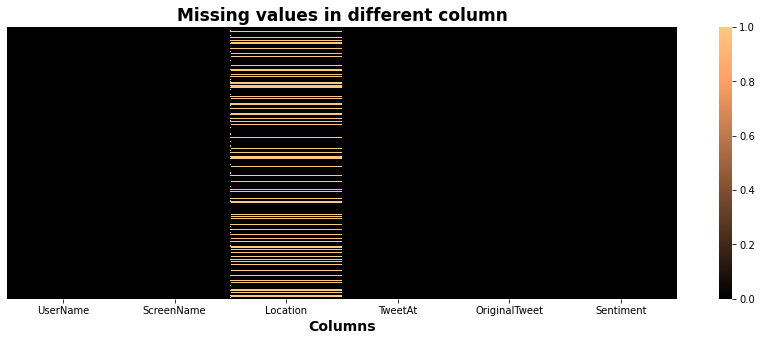

In [11]:
# Plotting heatmap of different columns to check the missing values
plt.figure(figsize=(15, 5))
sns.heatmap(tweet_df.isnull(), cbar=True, yticklabels=False, cmap='copper')
plt.xlabel("Columns", size=14, fontweight="bold")
plt.title("Missing values in different column",fontweight="bold",size=17)
plt.show()

muted' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'mag...

We will fill the null values in 'Location' with 'Unknown' because we don't know the locations of the tweets.

In [12]:
# Filling null values in 'Location' with unknown
# tweet_df.fillna(('Unknown') ,inplace = True)

In [13]:
# Checking for duplicapte values in the data set
tweet_df.duplicated().sum()

0

There are no duplicates values in this dataset

## Exploratory Data Analysis

In [14]:
# top 10 location of tweets
tweet_df['Location'].value_counts().head(10).to_frame()

,Location
London,540
United States,528
"London, England",520
"New York, NY",395
"Washington, DC",373
United Kingdom,337
"Los Angeles, CA",281
India,268
UK,232
Australia,225


In [15]:
top_loc = tweet_df['Location'].value_counts().head(10)
top_loc = pd.DataFrame(top_loc)
top_loc.reset_index(inplace= True)
top_loc.rename(columns = {'index': 'Location', 'Location': 'Tweet Count'}, inplace= True)
top_loc.head(10)

,Location,Tweet Count
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

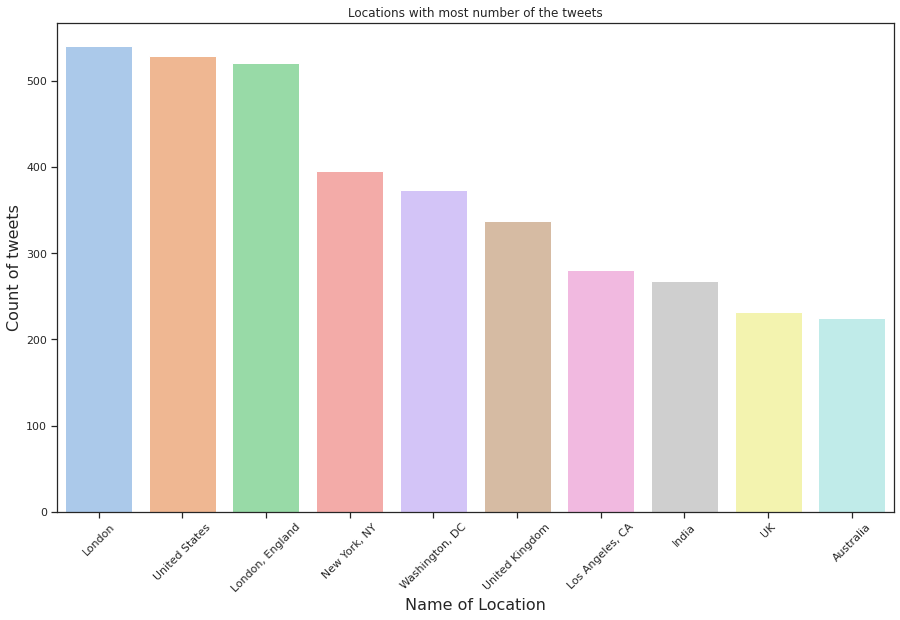

In [55]:
# plotting the top 10 locations with most number of tweets

# setting figure size
sns.set(rc={'figure.figsize':(15,9)})

# background style of figure
sns.set_style('ticks')

# barplot
sns.barplot(x='Location', y='Tweet Count', data=top_loc, palette='pastel')

# setting title
plt.title('Locations with most number of the tweets')

# label on y-axis
plt.ylabel('Count of tweets', fontsize = 16)

# label on x-axis
plt.xlabel('Name of Location', fontsize = 16)

# rotating x-labels for better visuluzation
plt.xticks(rotation=45)

In [18]:
tweet_df['TweetAt'].value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

In [20]:
tweet_df.TweetAt.describe()

count          41157
unique            30
top       20-03-2020
freq            3448
Name: TweetAt, dtype: object

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 <a list of 9 Text major ticklabel objects>)

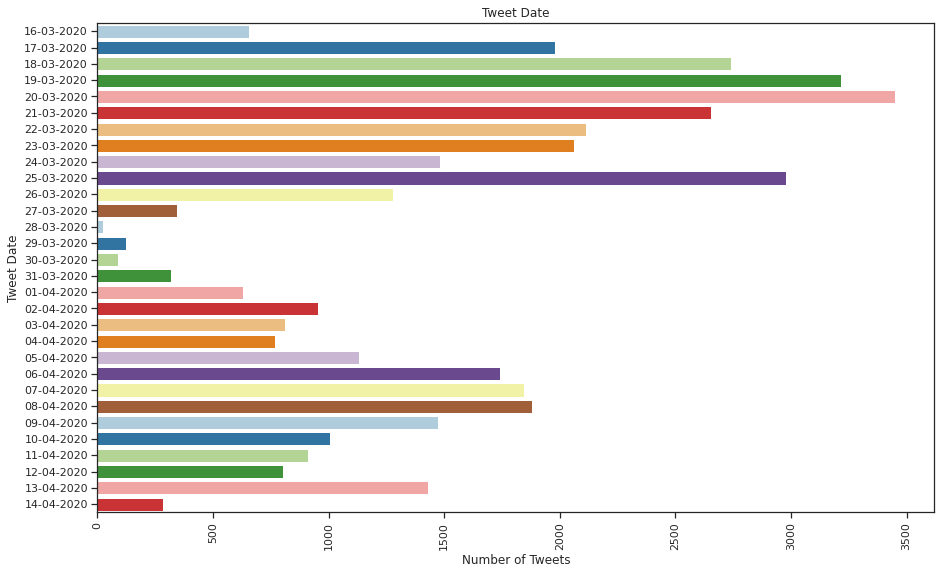

In [56]:
# Count plot
sns.countplot(y='TweetAt', data= tweet_df, palette='Paired')

# Setting title
plt.title("Tweet Date")

# Setting x-label
plt.ylabel("Tweet Date")

# Setting y-label
plt.xlabel("Number of Tweets")

# Adjusting x-labels
plt.xticks(rotation = 90)

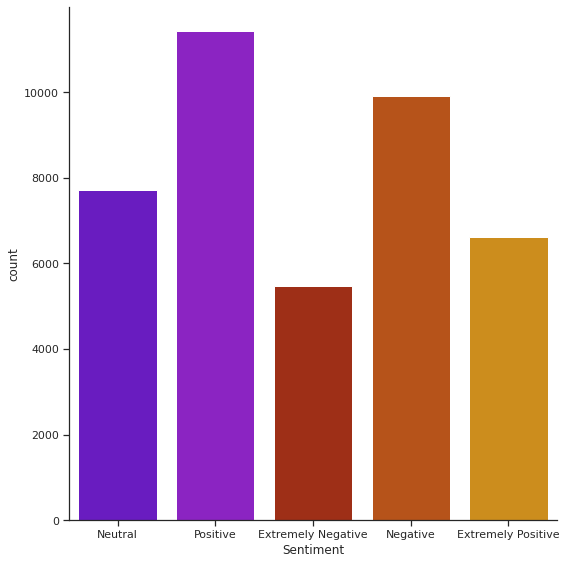

In [59]:
# sentiment plot
sns.catplot('Sentiment', data= tweet_df, kind='count', height=8, palette= 'gnuplot')